# Exploratory Data Analysis (Part 2)

# 1. Setup

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime as dt
sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

# 2. Read Processed Data

In [2]:
%%time
grf_ap_left  = pd.read_csv('..\data\processed\grf_ap_left.csv')
grf_ap_right = pd.read_csv('..\data\processed\grf_ap_right.csv')
grf_ml_left  = pd.read_csv('..\data\processed\grf_ml_left.csv')
grf_ml_right = pd.read_csv('..\data\processed\grf_ml_right.csv')
grf_v_left   = pd.read_csv('..\data\processed\grf_v_left.csv')
grf_v_right  = pd.read_csv('..\data\processed\grf_v_right.csv')
cop_ml_left  = pd.read_csv('..\data\processed\cop_ml_left.csv')
cop_ml_right = pd.read_csv('..\data\processed\cop_ml_right.csv')
cop_ap_left  = pd.read_csv('..\data\processed\cop_ap_left.csv')
cop_ap_right = pd.read_csv('..\data\processed\cop_ap_right.csv')

CPU times: total: 17.2 s
Wall time: 19.8 s


In [3]:
# Labelling
label = pd.read_csv(r'..\data\GaitRec\GRF_metadata.csv')

In [4]:
grf_v_left.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,510,413,1,0.023749,0.064212,0.132978,0.197432,0.254603,0.317527,0.394043,...,0.479860,0.398704,0.322715,0.257800,0.206161,0.157969,0.114536,0.078322,0.051086,0.030038
1,510,413,2,0.027479,0.084013,0.153125,0.213909,0.268096,0.340019,0.428372,...,0.444697,0.368860,0.299658,0.242390,0.193967,0.150712,0.109526,0.073994,0.048843,0.028040
2,510,413,3,0.026004,0.066777,0.122224,0.177144,0.231678,0.298016,0.372883,...,0.468087,0.389220,0.320403,0.257765,0.207438,0.159884,0.116295,0.077046,0.050402,0.028532
3,510,413,4,0.026241,0.080498,0.155492,0.234985,0.312395,0.401501,0.506381,...,0.450222,0.373759,0.305843,0.247477,0.200746,0.153727,0.111913,0.075615,0.050814,0.029449
4,510,413,6,0.027017,0.088312,0.164008,0.231150,0.289393,0.367465,0.463530,...,0.504436,0.422241,0.347770,0.280964,0.226931,0.175726,0.127687,0.084625,0.054879,0.030352


In [5]:
label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,2,0,1,29.01.2015,0,0,1
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,NaN,1,0.0,1,0,1,29.01.2015,0,0,1
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,3,0,1,29.01.2015,0,0,1
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,NaN,1,0.0,1,0,1,03.08.2017,1,0,0
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,NaN,1,0.0,3,0,1,03.08.2017,1,0,0


In [6]:
def calculate_BMI(height,weight):
    height_metres = height/100
    bmi=weight/(height_metres*height_metres)
    return bmi

In [7]:
calculate_BMI(173,52.6)

17.574927328009622

In [8]:
label['BMI']=label.apply(lambda x: calculate_BMI(x['HEIGHT'],x['BODY_MASS']), axis=1)

In [9]:
label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,...,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST,BMI
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,2,0,1,29.01.2015,0,0,1,17.574927
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,...,1,0.0,1,0,1,29.01.2015,0,0,1,17.574927
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,3,0,1,29.01.2015,0,0,1,17.574927
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,...,1,0.0,1,0,1,03.08.2017,1,0,0,23.155416
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,...,1,0.0,3,0,1,03.08.2017,1,0,0,23.155416


# 3. Visualisation and statistics
1. Data statistics
2. Normalise GRF with Body weight, Merge on Subject ID
3. Normalise COP with stride length, Merge on Subject ID (Females: Height in inches multiplied by 0.413 equals stride length. Males: Height in inches multiplied by 0.415 equals stride length.)

<br>
According to the University of Iowa, the average person’s walking step length is 2.5 feet (30 inches), so the average stride length would be approximately 5 feet (60 inches).
There are a number of factors that can impact stride length including: 
<br>

* height
* age
* injury
* illness
* terrain

In [10]:
# count of data
print(f'{grf_v_left.shape}')
print(f'{grf_ap_left.shape}') 
print(f'{grf_ml_left.shape}') 
print(f'{cop_ap_left.shape}') 
print(f'{cop_ml_left.shape}')
print(f'{grf_v_right.shape}')
print(f'{grf_ap_right.shape}') 
print(f'{grf_ml_right.shape}') 
print(f'{cop_ap_right.shape}') 
print(f'{cop_ml_right.shape}') 
print(f'{label.shape}')

(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(8971, 21)


In [11]:
# How many GD and HC?
label.groupby(['CLASS_LABEL']).size()

CLASS_LABEL
A     2587
C     1676
H     1512
HC     810
K     2386
dtype: int64

In [12]:
label.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'CLASS_LABEL', 'CLASS_LABEL_DETAILED',
       'SEX', 'AGE', 'HEIGHT', 'BODY_WEIGHT', 'BODY_MASS', 'SHOE_SIZE',
       'AFFECTED_SIDE', 'SHOD_CONDITION', 'ORTHOPEDIC_INSOLE', 'SPEED',
       'READMISSION', 'SESSION_TYPE', 'SESSION_DATE', 'TRAIN',
       'TRAIN_BALANCED', 'TEST', 'BMI'],
      dtype='object')

In [13]:
#Get list of subjects for each class
list_hc =  label.loc[label['CLASS_LABEL'] == 'HC']['SUBJECT_ID'].unique()
list_c =  label.loc[label['CLASS_LABEL'] == 'C']['SUBJECT_ID'].unique()
list_a =  label.loc[label['CLASS_LABEL'] == 'A']['SUBJECT_ID'].unique()
list_k =  label.loc[label['CLASS_LABEL'] == 'K']['SUBJECT_ID'].unique()
list_h =  label.loc[label['CLASS_LABEL'] == 'H']['SUBJECT_ID'].unique()


In [14]:
# Check classes do not overlap
label_hc =label.loc[label['SUBJECT_ID'].isin(list_hc)]
label_c =label.loc[label['SUBJECT_ID'].isin(list_c)]
label_a =label.loc[label['SUBJECT_ID'].isin(list_a)]
label_k =label.loc[label['SUBJECT_ID'].isin(list_k)]
label_h =label.loc[label['SUBJECT_ID'].isin(list_h)]
print(label_hc['CLASS_LABEL'].unique())
print(label_c['CLASS_LABEL'].unique())
print(label_a['CLASS_LABEL'].unique())
print(label_k['CLASS_LABEL'].unique())
print(label_h['CLASS_LABEL'].unique())

['HC']
['C']
['A']
['K']
['H']


In [15]:
## Understand health controls by categories
label.groupby(['CLASS_LABEL']).agg({
    'SEX': 'unique',
    'AFFECTED_SIDE':'unique', 
    'SHOD_CONDITION':'unique', 
    'ORTHOPEDIC_INSOLE':'unique', 
    'SPEED':'unique',
    'READMISSION':'unique', 
    'SESSION_TYPE':'unique'
})

,SEX,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE
CLASS_LABEL,,,,,,,
A,"[1, 0]","[2.0, 1.0, 0.0]","[1, 2, 0]","[0.0, 1.0, nan]",[2],"[0, 1, 2]","[1, 2, 3]"
C,"[1, 0]","[1.0, 2.0, 0.0]","[1, 2, 0]","[0.0, 1.0, nan]",[2],"[0, 1, 2, 3]","[1, 2, 3]"
H,"[1, 0]","[1.0, 0.0, 2.0]","[1, 0, 2]","[0.0, 1.0, nan]",[2],"[0, 1, 2]","[1, 2, 3]"
HC,"[1, 0]",[nan],"[1, 0]",[0.0],"[2, 1, 3]",[0],[1]
K,"[1, 0]","[1.0, 0.0, 2.0]","[1, 0, 2]","[0.0, 1.0, nan]",[2],"[0, 1, 2, 3]","[2, 1, 3]"


In [16]:
## Understand health controls by numerical 
label.groupby(['SEX','CLASS_LABEL']).agg({
    'AGE': ['min','mean','max'],
    'HEIGHT': ['min','mean','max'],
    'BODY_MASS':['min','mean','max'],
    'BMI': ['min','mean','max'],
    'SHOE_SIZE': ['min','mean','max'],
})

AGE                HEIGHT                    BODY_MASS  \
                min       mean max    min        mean    max       min   
SEX CLASS_LABEL                                                          
0   A            14  41.615063  65  154.0  167.502732  187.0      45.4   
    C            20  40.921348  59  158.0  168.291139  176.0      47.6   
    H            17  46.141791  70  153.0  165.822222  178.0      38.5   
    HC           15  34.832536  67  152.0  167.102871  183.0      41.3   
    K            15  41.666667  74  150.0  167.697368  188.0      47.4   
1   A            15  41.439071  71  160.0  178.103059  198.0      51.0   
    C            16  44.465287  68  165.0  178.811665  196.0      51.3   
    H            14  42.012862  74  165.0  178.440945  196.0      53.1   
    HC           17  34.931122  78  163.0  179.176020  192.0      52.6   
    K             9  41.058898  80  145.0  179.212719  202.0      47.8   

                                         BMI                       SHOE_SIZE  \
                      mean    max        min       mean        max       min   
SEX CLASS_LABEL                                                                
0   A            74.012343  123.4  17.128028  26.160547  48.203125      36.0   
    C            71.007303  110.3  18.557328  24.979803  33.094582      37.0   
    H            66.552985  110.3  18.738846  24.660468  37.557528      36.0   
    HC           66.090670  108.1  17.190427  23.703319  40.546875      36.0   
    K            71.185626  139.2  16.512346  25.709841  41.046996      35.0   
1   A            89.979753  165.2  17.080235  28.224183  47.241843      38.0   
    C            86.093725  143.0  15.819345  26.919857  39.242870      40.0   
    H            85.572669  137.0  17.716049  26.849480  45.465954      40.0   
    HC           82.053571  143.2  17.574927  25.541725  43.035183      39.0   
    K            89.673401  170.0  16.238378  28.007281  51.294755      40.0   

                                  
                      mean   max  
SEX CLASS_LABEL                   
0   A            39.207182  45.0  
    C            39.316456  42.0  
    H            38.377778  42.0  
    HC           38.614833  43.0  
    K            39.180682  42.0  
1   A            43.165110  47.0  
    C            43.422046  49.0  
    H            43.317965  47.0  
    HC           43.321429  48.0  
    K            43.557650  50.0

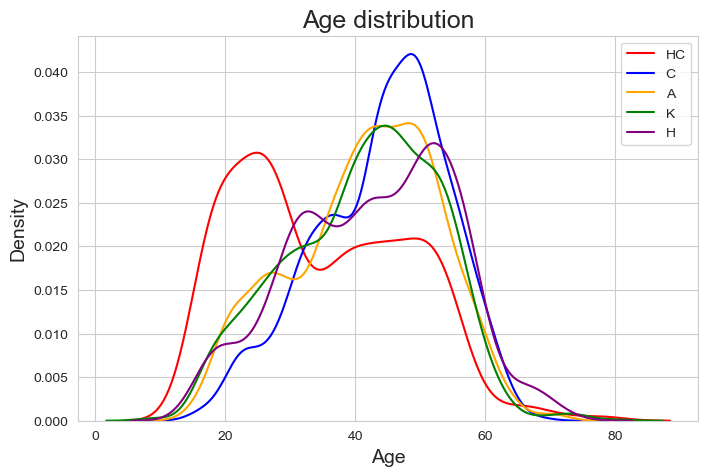

In [17]:
#What is the age distribution between GD and HC?
plt.figure(figsize=(8,5))
sns.distplot(label_hc['AGE'],color='r',hist=False,label='HC')
sns.distplot(label_c['AGE'],color='b',hist=False,label='C')
sns.distplot(label_a['AGE'],color='orange',hist=False,label='A')
sns.distplot(label_k['AGE'],color='g',hist=False,label='K')
sns.distplot(label_h['AGE'],color='purple',hist=False,label='H')
plt.legend()
plt.title('Age distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.show()

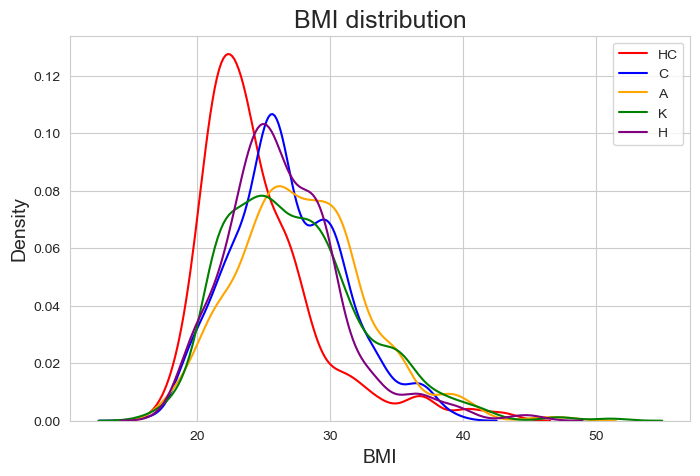

In [18]:
#What is the BMI distribution? 
plt.figure(figsize=(8,5))
sns.distplot(label_hc['BMI'],color='r',hist=False,label='HC')
sns.distplot(label_c['BMI'],color='b',hist=False,label='C')
sns.distplot(label_a['BMI'],color='orange',hist=False,label='A')
sns.distplot(label_k['BMI'],color='g',hist=False,label='K')
sns.distplot(label_h['BMI'],color='purple',hist=False,label='H')
plt.legend()
plt.title('BMI distribution',size=18)
plt.xlabel('BMI',size=14)
plt.ylabel('Density',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

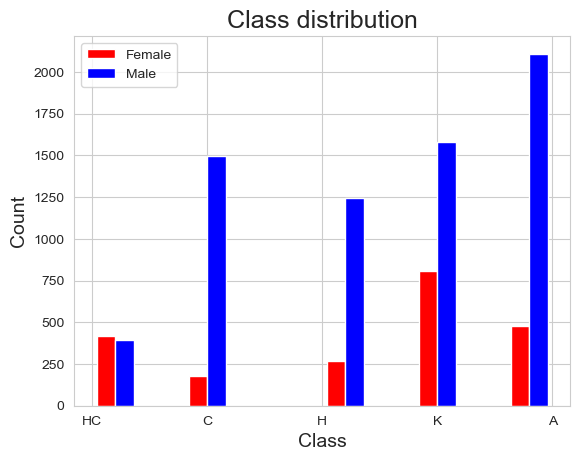

In [19]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SEX'] == 0]['CLASS_LABEL']
y2 = label.loc[label['SEX'] == 1]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2],color=['r','b'],label=['Female','Male'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

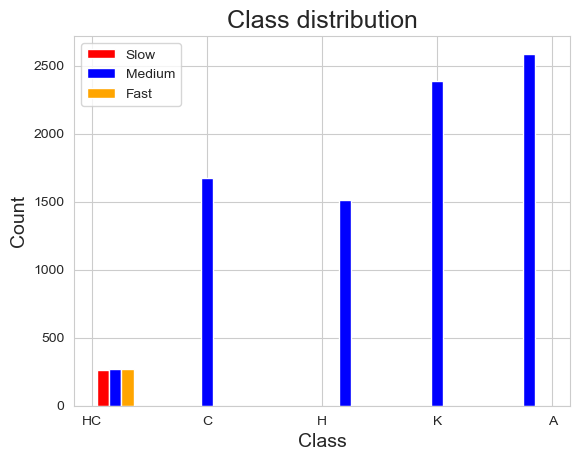

In [20]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SPEED'] == 1]['CLASS_LABEL']
y2 = label.loc[label['SPEED'] == 2]['CLASS_LABEL']
y3 = label.loc[label['SPEED'] == 3]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Slow','Medium','Fast'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

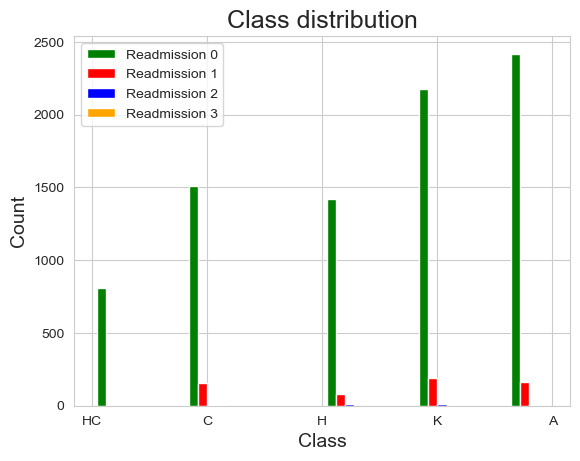

In [21]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['READMISSION'] == 1]['CLASS_LABEL']
y2 = label.loc[label['READMISSION'] == 2]['CLASS_LABEL']
y3 = label.loc[label['READMISSION'] == 3]['CLASS_LABEL']
y0 = label.loc[label['READMISSION'] == 0]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y0,y1,y2,y3],color=['g','r','b','orange'],label=['Readmission 0','Readmission 1','Readmission 2','Readmission 3'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

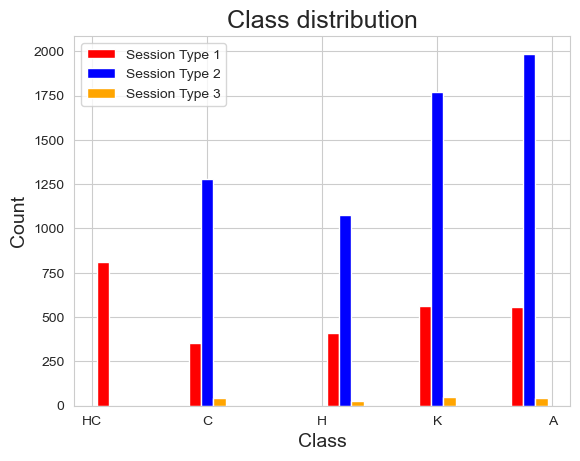

In [22]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SESSION_TYPE'] == 1]['CLASS_LABEL']
y2 = label.loc[label['SESSION_TYPE'] == 2]['CLASS_LABEL']
y3 = label.loc[label['SESSION_TYPE'] == 3]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Session Type 1','Session Type 2','Session Type 3'])
plt.legend()
plt.title('Class distribution',size=18)
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

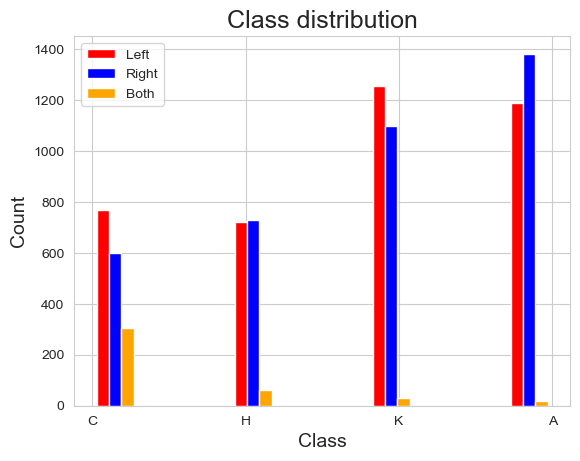

In [23]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['AFFECTED_SIDE'] == 0]['CLASS_LABEL']
y2 = label.loc[label['AFFECTED_SIDE'] == 1]['CLASS_LABEL']
y3 = label.loc[label['AFFECTED_SIDE'] == 2]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Left','Right','Both'])
plt.legend()
plt.title('Class distribution',size=18)
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

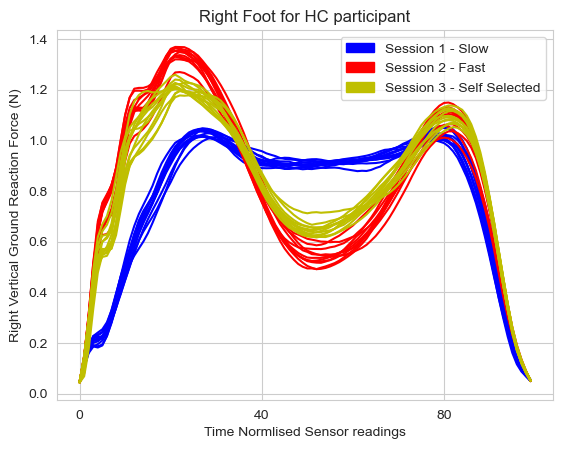

In [24]:
p1 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30207) , grf_v_right.columns[3:]]
p3 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30206) , grf_v_right.columns[3:]]
p2 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30208) , grf_v_right.columns[3:]]

# Plot
for i in range(0,len(p1)):
    p1.iloc[i].plot(color='b')
    session1 = mpatches.Patch(color='b', label='Session 1 - Slow')
for i in range(0,len(p2)):
    p2.iloc[i].plot(color='r')
    session2 = mpatches.Patch(color='r', label='Session 2 - Fast')
for i in range(0,len(p3)):
    p3.iloc[i].plot(color='y')
    session3 = mpatches.Patch(color='y', label='Session 3 - Self Selected')
plt.legend(loc="upper right",handles=[session1, session2, session3])
plt.title('Right Foot for HC participant')
plt.xlabel('Time Normlised Sensor readings')
plt.locator_params(axis="x", nbins=5)
plt.ylabel('Right Vertical Ground Reaction Force (N)')
plt.show()

In [25]:
list_c[0]

212

In [133]:
def plot_by_index(df,label,index):
    x_hc = df.merge(label,on=['SUBJECT_ID','SESSION_ID']).loc[(df.SUBJECT_ID == list_hc[index]) & (df.SPEED == '2') ,df.columns[3:]]
    x_c = df.loc[(df.SUBJECT_ID == list_c[index]) , df.columns[3:]]
    x_a = df.loc[(df.SUBJECT_ID == list_a[index]) , df.columns[3:]]
    x_k = df.loc[(df.SUBJECT_ID == list_k[index]) , df.columns[3:]]
    x_h = df.loc[(df.SUBJECT_ID == list_h[index]) , df.columns[3:]]
    # Plot
    fig, ax = plt.subplots()
    for i in range(0,len(x_hc)):
        x_hc.iloc[i].plot(color='green')
        l_hc = mpatches.Patch(color='green', label='HC')
        ax.fill_between(x, y1, y1+.5, facecolor=(1,0,0,.4), edgecolor=(0,0,0,.5))     
    for i in range(0,len(x_c)):
        x_c.iloc[i].plot(color='blue')
        l_c = mpatches.Patch(color='blue', label='C')
    for i in range(0,len(x_a)):
        x_a.iloc[i].plot(color='red')
        l_a = mpatches.Patch(color='red', label='A')
    for i in range(0,len(x_k)):
        x_k.iloc[i].plot(color='orange')
        l_k = mpatches.Patch(color='orange', label='K')
    for i in range(0,len(x_h)):
        x_h.iloc[i].plot(color='purple')
        l_h = mpatches.Patch(color='purple', label='H')
    plt.legend(loc="upper right",handles=[l_hc,l_c,l_a,l_k,l_h])
    plt.title('Participant')
    plt.xlabel('Time Normlised Sensor readings')
    plt.locator_params(axis="x", nbins=5)
    plt.ylabel('Data')
    plt.show()

In [47]:
def plot_class_range(df,label):
    x_hc =df.loc[(df.SUBJECT_ID.isin(list_hc))].merge(label.loc[label.SPEED == 2],on=['SUBJECT_ID','SESSION_ID']).iloc[:, 3:103]
    x_c = df.loc[(df.SUBJECT_ID.isin(list_c)) , df.columns[3:]]
    x_a = df.loc[(df.SUBJECT_ID.isin(list_a)) , df.columns[3:]]
    x_k = df.loc[(df.SUBJECT_ID.isin(list_k)) , df.columns[3:]]
    x_h = df.loc[(df.SUBJECT_ID.isin(list_h)) , df.columns[3:]]
    # Plot
    fig, ax = plt.subplots()
    #HC
    l_hc = mpatches.Patch(color=(1,0,1,.4), label='HC')
    y_hc_0 = x_hc.mean() - x_hc.std()
    y_hc_1 = x_hc.mean() + x_hc.std()
    ax.fill_between(x_hc.columns, y_hc_0, y_hc_1, facecolor=(1,0,1,.4), edgecolor=(0,0,0,.5), label="HC")
    #C
    l_c = mpatches.Patch(color=(1,0,0,.4), label='C')
    y_c_0 = x_c.mean() - x_c.std()
    y_c_1 = x_c.mean() + x_c.std()
    ax.fill_between(x_c.columns, y_c_0, y_c_1, facecolor=(1,0,0,.4), edgecolor=(0,0,0,.5), label="C")
    #A
    l_a = mpatches.Patch(color=(1,1,0,.4), label='A')
    y_a_0 = x_a.mean() - x_a.std()
    y_a_1 = x_a.mean() + x_a.std()
    ax.fill_between(x_a.columns, y_a_0, y_a_1, facecolor=(1,1,0,.4), edgecolor=(0,0,0,.5), label="A")
    #K
    l_k = mpatches.Patch(color=(0,1,1,.4), label='K')
    y_k_0 = x_k.mean() - x_k.std()
    y_k_1 = x_k.mean() + x_k.std()
    ax.fill_between(x_k.columns, y_k_0, y_k_1, facecolor=(0,1,1,.4), edgecolor=(0,0,0,.5), label="K")
    #H
    l_h = mpatches.Patch(color=(0,0,1,.4), label='H')
    y_h_0 = x_hc.mean() - x_h.std()
    y_h_1 = x_hc.mean() + x_h.std()
    ax.fill_between(x_h.columns, y_h_0, y_h_1, facecolor=(0,0,1,.4), edgecolor=(0,0,0,.5), label="H")
    plt.legend(loc="upper right",handles=[l_hc,l_c,l_a,l_k,l_h])
    plt.title('Participant')
    plt.xlabel('Time Normlised Sensor readings')
    plt.locator_params(axis="x", nbins=5)
    plt.ylabel('Data')
    plt.show()

In [48]:
def plot_class_mean(df,label):
    x_hc =df.loc[(df.SUBJECT_ID.isin(list_hc))].merge(label.loc[label.SPEED == 2],on=['SUBJECT_ID','SESSION_ID']).iloc[:, 3:103]
    x_c = df.loc[(df.SUBJECT_ID.isin(list_c)) , df.columns[3:]]
    x_a = df.loc[(df.SUBJECT_ID.isin(list_a)) , df.columns[3:]]
    x_k = df.loc[(df.SUBJECT_ID.isin(list_k)) , df.columns[3:]]
    x_h = df.loc[(df.SUBJECT_ID.isin(list_h)) , df.columns[3:]]
    # Plot
    fig, ax = plt.subplots()
    #HC
    l_hc = mpatches.Patch(color='green', label='HC')
    x_hc.mean().plot(color='green')
    #C
    l_c = mpatches.Patch(color='blue', label='C')
    x_c.mean().plot(color='blue')
    #A
    l_a = mpatches.Patch(color='orange', label='A')
    x_a.mean().plot(color='orange')
    #K
    l_k = mpatches.Patch(color='red', label='K')
    x_k.mean().plot(color='red')
    #H
    l_h = mpatches.Patch(color='purple', label='H')
    x_h.mean().plot(color='purple')
    
    plt.legend(loc="upper right",handles=[l_hc,l_c,l_a,l_k,l_h])
    plt.title('Participant')
    plt.xlabel('Time Normlised Sensor readings')
    plt.locator_params(axis="x", nbins=5)
    plt.ylabel('Data')
    plt.show()

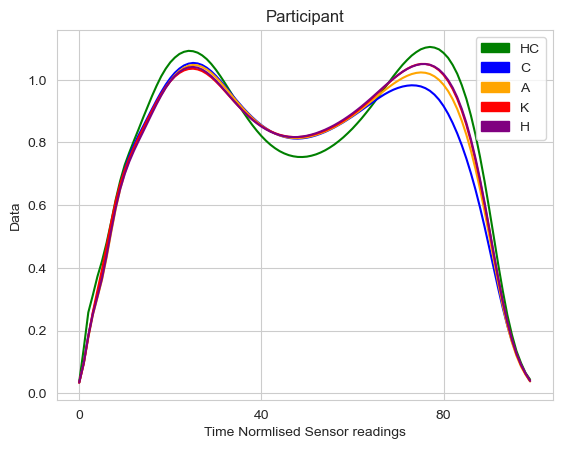

CPU times: total: 266 ms
Wall time: 440 ms


In [49]:
%%time
plot_class_mean(grf_v_left,label)

**Vertical force**
* HC has highest peaks (20-30)(60-80) and lowest valley(40-60).
* A,C has lower 2nd peak
* What the 2 peaks and 1 valley represent?
* Feature: g_v_max_1(20-40), g_v_max_2 (60-80), g_v_min (40-60)

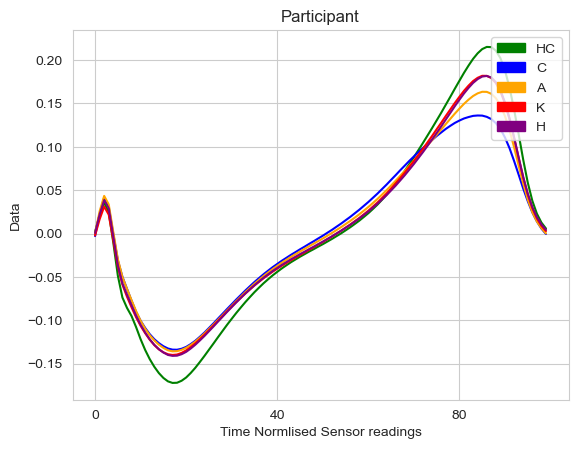

In [50]:
plot_class_mean(grf_ap_left,label)

**Walking direction shear force**
* HC has lowest point in (10-30) and highest point in (80-90)
* K,H followed by A and C have lowest peak at (80-90)
* Feature: g_ap_min(10-30), g_ap_max (80-100)

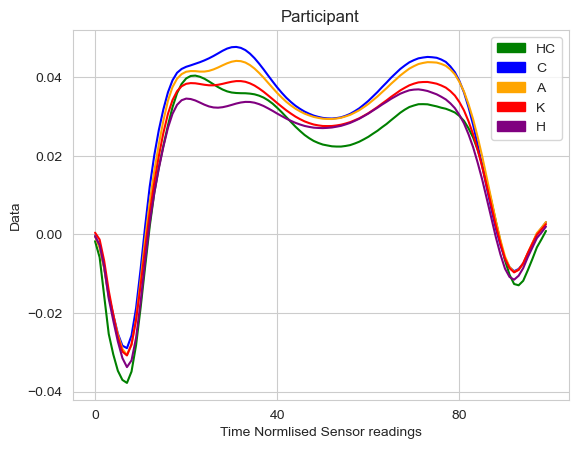

In [58]:
plot_class_mean(grf_ml_left,label)

**Side-to-side shear force**
* HC - The second peak is lower (60-80)
* HC- Lower valley (40-60)
* CA has highest 2nd peak (60-80)
* What is the second peak?
* Feature: g_ml_max_1(20-40), g_ml_max_2 (60-80), g_ml_min (40-60)

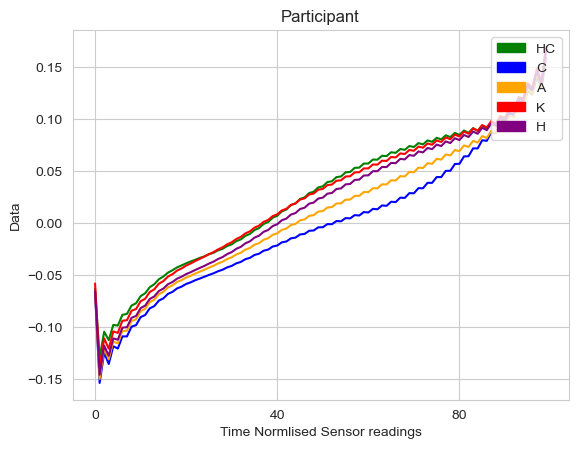

In [52]:
plot_class_mean(cop_ap_left,label)

**Center of Pressure in walking direction**
* Lower slope for A followed by C at (40-80)
* What does the slope represent?
* Feature: c_ap_slope (40-80)

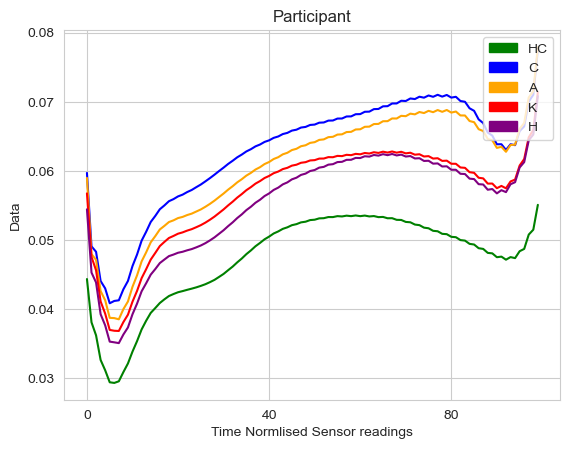

In [53]:
plot_class_mean(cop_ml_right,label)

**Center of Pressure in side-to-side direction**
* Lower mean values for both the lowest value (0-10) and highest value (50-80) for HC.
* A,C has the highest peak
* What the 2 values represent?
* Feature: c_ml_min(0-20), c_ml_max(40-80)

In [33]:
#df.merge(df_label[['SUBJECT_ID','SESSION_ID',column]], how='inner', on=['SUBJECT_ID','SESSION_ID'])
#df_merged.loc[:, cols] = df_merged.loc[:, cols].div(df_merged[column], axis=0)
#grf_ap_left_n[grf_ap_left_n.columns[3:]].head().transpose().plot()

## Feature Engineering
* Feature: c_ml_min(0-20), c_ml_max(40-80)
* Feature: c_ap_slope (40-80)
* Feature: g_ml_max_1(20-40), g_ml_max_2 (60-80), g_ml_min (40-60)
* Feature: g_ap_min(10-30), g_ap_max (80-100)
* Feature: g_v_max_1(20-40), g_v_max_2 (60-80), g_v_min (40-60)

In [104]:
%%time
cop_ml_right['c_ml_min_r']= cop_ml_right.apply(lambda x: x[3:23].min(), axis=1)
cop_ml_right['c_ml_max_r']= cop_ml_right.apply(lambda x: x[43:83].max(), axis=1)
cop_ml_left['c_ml_min_l']= cop_ml_left.apply(lambda x: x[3:23].min(), axis=1)
cop_ml_left['c_ml_max_l']= cop_ml_left.apply(lambda x: x[43:83].max(), axis=1)

CPU times: total: 35.1 s
Wall time: 36 s


In [106]:
%%time
grf_ml_right['g_ml_max1_r']= grf_ml_right.apply(lambda x: x[23:43].max(), axis=1)
grf_ml_right['g_ml_min_r']= grf_ml_right.apply(lambda x: x[43:63].min(), axis=1)
grf_ml_right['g_ml_max2_r']= grf_ml_right.apply(lambda x: x[63:83].max(), axis=1)

grf_ml_left['g_ml_max1_l']= grf_ml_left.apply(lambda x: x[23:43].max(), axis=1)
grf_ml_left['g_ml_min_l']= grf_ml_left.apply(lambda x: x[43:63].min(), axis=1)
grf_ml_left['g_ml_max2_l']= grf_ml_left.apply(lambda x: x[63:83].max(), axis=1)

CPU times: total: 51.3 s
Wall time: 52.6 s


In [107]:
%%time
grf_v_right['g_v_max1_r']= grf_v_right.apply(lambda x: x[23:43].max(), axis=1)
grf_v_right['g_v_min_r']= grf_v_right.apply(lambda x: x[43:63].min(), axis=1)
grf_v_right['g_v_max2_r']= grf_v_right.apply(lambda x: x[63:83].max(), axis=1)
grf_v_left['g_v_max1_l']= grf_v_left.apply(lambda x: x[23:43].max(), axis=1)
grf_v_left['g_v_min_l']= grf_v_left.apply(lambda x: x[43:63].min(), axis=1)
grf_v_left['g_v_max2_l']= grf_v_left.apply(lambda x: x[63:83].max(), axis=1)

CPU times: total: 54.9 s
Wall time: 1min 2s


In [108]:
%%time
grf_ap_right['g_ap_min_r']= grf_ap_right.apply(lambda x: x[13:33].min(), axis=1)
grf_ap_right['g_ap_max_r']= grf_ap_right.apply(lambda x: x[83:103].max(), axis=1)
grf_ap_left['g_ap_min_l']= grf_ap_left.apply(lambda x: x[13:33].min(), axis=1)
grf_ap_left['g_ap_max_l']= grf_ap_left.apply(lambda x: x[83:103].max(), axis=1)

CPU times: total: 34.7 s
Wall time: 36.3 s


In [109]:
np.polyfit([1,2,3],[0.5,0.6,0.7],1)[0]

0.09999999999999987

In [111]:
%%time
cop_ap_right['c_ap_slope_r']= cop_ap_right.apply(lambda x: np.polyfit(list(range(0,40)),x[43:83],1)[0], axis=1)
cop_ap_left['c_ap_slope_l']= cop_ap_left.apply(lambda x: np.polyfit(list(range(0,40)),x[43:83],1)[0], axis=1)

CPU times: total: 33.2 s
Wall time: 34.4 s


In [112]:
cop_ap_right.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,c_ap_slope_r
0,510,413,1,-0.084075,-0.177208,-0.142869,-0.154372,-0.138035,-0.142663,-0.131272,...,0.082809,0.083461,0.101845,0.103879,0.122863,0.117160,0.139472,0.122713,0.166645,0.001718
1,510,413,2,-0.059899,-0.166058,-0.129422,-0.143224,-0.126853,-0.133406,-0.120933,...,0.098945,0.100760,0.118564,0.119555,0.137854,0.130791,0.151529,0.133259,0.183354,0.001589
2,510,413,3,-0.130538,-0.233268,-0.197756,-0.211456,-0.192872,-0.198469,-0.188635,...,0.012962,0.015154,0.033064,0.035044,0.054675,0.051841,0.069224,0.054549,0.104764,0.001740
3,510,413,4,-0.155750,-0.219009,-0.193027,-0.206954,-0.191643,-0.196173,-0.187144,...,0.017847,0.020854,0.037035,0.040167,0.057249,0.051778,0.068123,0.050789,0.073664,0.001919
4,510,413,6,-0.078325,-0.152073,-0.122845,-0.132998,-0.118704,-0.122371,-0.112182,...,0.109818,0.111535,0.129478,0.130684,0.145596,0.137794,0.157615,0.140615,0.175189,0.001837


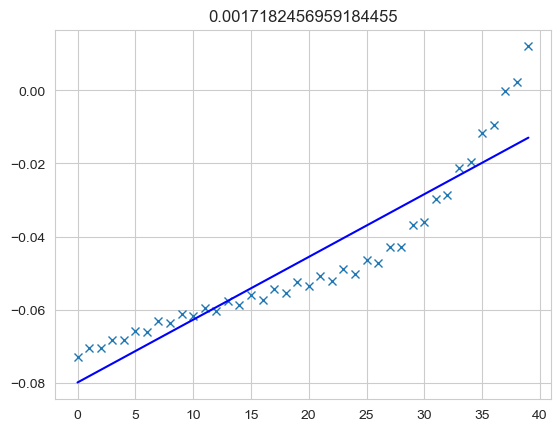

In [113]:
Y = cop_ap_right.iloc[:, 43:83].iloc[0]
X = list(range(0,40))
slope, intercept= np.polyfit(X,Y,1)
abline = [slope * i + intercept for i in X]
# Plot
plt.plot(X, Y, 'x')
plt.plot(X, abline, 'b')
plt.title(slope)
plt.show()

### Merging the dataframes

In [114]:
base = ['SUBJECT_ID','SESSION_ID','TRIAL_ID']

In [126]:
label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,...,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST,BMI
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,2,0,1,29.01.2015,0,0,1,17.574927
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,...,1,0.0,1,0,1,29.01.2015,0,0,1,17.574927
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,3,0,1,29.01.2015,0,0,1,17.574927
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,...,1,0.0,1,0,1,03.08.2017,1,0,0,23.155416
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,...,1,0.0,3,0,1,03.08.2017,1,0,0,23.155416


In [128]:
df = cop_ml_right[base+['c_ml_min_r','c_ml_max_r']].merge(
    cop_ml_left[base+['c_ml_min_l','c_ml_max_l']], on=base).merge(
    cop_ap_right[base+['c_ap_slope_r']], on=base).merge(
    cop_ap_left[base+['c_ap_slope_l']], on=base).merge(
    grf_ml_right[base+['g_ml_max1_r','g_ml_min_r','g_ml_max2_r']], on=base).merge(
    grf_ml_left[base+['g_ml_max1_l','g_ml_min_l','g_ml_max2_l']], on=base).merge(
    grf_ap_right[base+['g_ap_min_r','g_ap_max_r']], on=base).merge(
    grf_ap_left[base+['g_ap_min_l','g_ap_max_l']], on=base).merge(
    grf_v_right[base+['g_v_max1_r','g_v_min_r','g_v_max2_r']], on=base).merge(
    grf_v_left[base+['g_v_max1_l','g_v_min_l','g_v_max2_l']], on=base).merge(
    label[['SUBJECT_ID','SESSION_ID','AGE','BMI','CLASS_LABEL']], on=['SUBJECT_ID','SESSION_ID'])

In [129]:
df

,SUBJECT_ID,SESSION_ID,TRIAL_ID,c_ml_min_r,c_ml_max_r,c_ml_min_l,c_ml_max_l,c_ap_slope_r,c_ap_slope_l,g_ml_max1_r,...,g_ap_max_l,g_v_max1_r,g_v_min_r,g_v_max2_r,g_v_max1_l,g_v_min_l,g_v_max2_l,AGE,BMI,CLASS_LABEL
0,510,413,1,0.087271,0.118247,0.087814,0.128115,0.001718,0.002493,0.072643,...,0.130772,1.035925,0.818121,0.987930,1.083287,0.796622,1.003385,47,35.538442,C
1,510,413,2,0.085806,0.128396,0.040212,0.083074,0.001589,0.001834,0.072360,...,0.136687,1.009803,0.819649,0.991990,1.018526,0.837006,0.999401,47,35.538442,C
2,510,413,3,0.073788,0.112735,0.049990,0.099952,0.001740,0.001734,0.059417,...,0.143187,1.010970,0.823223,0.989883,1.049092,0.815221,1.003578,47,35.538442,C
3,510,413,4,0.056216,0.102832,0.086729,0.127982,0.001919,0.001361,0.079792,...,0.155758,1.047625,0.797822,1.005463,1.118118,0.773203,1.021851,47,35.538442,C
4,510,413,6,0.064922,0.102404,0.000573,0.052266,0.001837,0.002049,0.059537,...,0.140561,1.044787,0.780821,1.009273,1.084354,0.820851,1.027245,47,35.538442,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75727,93,999910375,6,0.057389,0.081491,-0.007720,-0.005253,0.001445,0.000769,0.027693,...,0.296245,1.227360,0.635865,1.188197,1.210305,0.600266,0.862586,53,21.588183,HC
75728,93,999910375,7,0.060523,0.065029,0.077223,0.107414,0.001117,0.001277,0.069434,...,0.313936,1.360617,0.653168,1.074324,1.195931,0.691509,1.105625,53,21.588183,HC
75729,93,999910375,9,0.068348,0.103938,0.014182,0.031058,0.001457,0.001514,0.042854,...,0.317704,1.220940,0.697688,1.129716,1.132665,0.683090,1.187864,53,21.588183,HC
75730,93,999910375,10,0.032184,0.046935,-0.001137,0.021139,0.001090,0.001431,0.048381,...,0.310775,1.221073,0.704733,1.160231,1.155511,0.767917,1.133180,53,21.588183,HC


In [131]:
df.to_csv('../data/features_engineered.csv', index=False)

In [132]:
df.isna().sum()

SUBJECT_ID          0
SESSION_ID          0
TRIAL_ID            0
c_ml_min_r          0
c_ml_max_r          0
c_ml_min_l          0
c_ml_max_l          0
c_ap_slope_r        0
c_ap_slope_l        0
g_ml_max1_r         0
g_ml_min_r          0
g_ml_max2_r         0
g_ml_max1_l         0
g_ml_min_l          0
g_ml_max2_l         0
g_ap_min_r          0
g_ap_max_r          0
g_ap_min_l          0
g_ap_max_l          0
g_v_max1_r          0
g_v_min_r           0
g_v_max2_r          0
g_v_max1_l          0
g_v_min_l           0
g_v_max2_l          0
AGE                 0
BMI             26992
CLASS_LABEL         0
dtype: int64